In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [19]:
def plot_vv_fc_data(coil_data):
    R = np.zeros((len(coil_data), 6))
    Z = R.copy()
    
    for i in range(coil_data.shape[0]):
        z, r, dz, dr, ac, ac2 = coil_data[i]
        #l = np.sqrt(dz**2 + dr**2)

        s = dr*np.tan(ac*np.pi/180)
        c = dz/np.tan(ac2*np.pi/180) if ac2 != 0 else 0

        R[i] = [ r - 0.5*(dr+c),
                 r - 0.5*(dr-c),
                 r + 0.5*(dr+c),
                 r + 0.5*(dr-c),
                 r - 0.5*(dr+c),
                 np.NaN
               ]
        Z[i] = [ z - 0.5*(dz+s),
                 z + 0.5*(dz-s),
                 z + 0.5*(dz+s),
                 z - 0.5*(dz-s),
                 z - 0.5*(dz+s),
                 np.NaN
               ]
    plt.plot(R.reshape(-1), Z.reshape(-1))

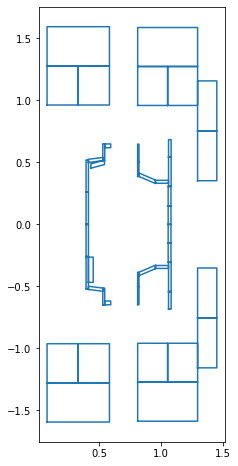

In [20]:
def plot_cmod_vv_data():
    vv_data = loadmat("vvdata.mat")['vvdata'].T
    vv_data
    plt.figure(figsize=(8,8))
    plt.axes(aspect='equal')
    plot_vv_fc_data(vv_data)
    
plot_cmod_vv_data()
    

In [21]:
import ezdxf
def vv_fc_data_dxf(coil_data, msp):
    RZ = np.zeros((4,2))
    
    for i in range(coil_data.shape[0]):
        z, r, dz, dr, ac, ac2 = coil_data[i]
        #l = np.sqrt(dz**2 + dr**2)

        s = dr*np.tan(ac*np.pi/180)
        c = dz/np.tan(ac2*np.pi/180) if ac2 != 0 else 0

        RZ[:,0] = [ 
                 r - 0.5*(dr+c),
                 r - 0.5*(dr-c),
                 r + 0.5*(dr+c),
                 r + 0.5*(dr-c)
               ]
        RZ[:,1] = [ z - 0.5*(dz+s),
                 z + 0.5*(dz-s),
                 z + 0.5*(dz+s),
                 z - 0.5*(dz-s)
               ]
        msp.add_lwpolyline(RZ, close=True)

doc = ezdxf.new("R2000")
msp = doc.modelspace()
vv_fc_data_dxf(vv_data, msp)
doc.saveas("cmod_vvdata.dxf")